In [149]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table, vstack
import pandas as pd
from astropy.io import ascii
import os 
import glob 

In [150]:
files = glob.glob("*.snana.txt")
for file in files:
    print(file)

2020hgw_YSEdata.snana.txt
2020jfo_YSEdata.snana.txt
2020kpz_YSEdata.snana.txt
2020rth_YSEdata.snana.txt
2020tly_YSEdata.snana.txt


In [151]:
def import_snana(filename):
    start_data = False
    table = None
    with open(filename) as f:
        for i,line in enumerate(f):
            if 'VARLIST' in line:
                header = line.split()
                header = header[0:9]
                dummy = [['X'*20]]*len(header)
                table = Table(dummy, names=header).copy()[:0]
            elif table is not None:
                data=line.split()
                data=data[0:9]
                if len(data)!=9:
                    break
                table.add_row(data)
    mask = np.array([r['MAGERR'] is not None for r in table])
    table = table[mask]
    table['MJD']    = table['MJD'].astype(float)
    table['FLT'] = table['FLT'].astype(str)
    table['FLUXCAL'] = table['MAGERR'].astype(float)
    table['FLUXCALERR'] = table['MAGERR'].astype(float)
    table['MAG'] = table['MAG'].astype(float)
    table['MAGERR'] = table['MAGERR'].astype(float)
    return(table)

In [152]:
hgw = import_snana('2020hgw_YSEdata.snana.txt')
jfo = Table.read('2020jfo_lightcurves', format = 'ascii')
kpz = import_snana('2020kpz_YSEdata.snana.txt')
rth = import_snana('2020rth_YSEdata.snana.txt')
tly = import_snana('2020tly_YSEdata.snana.txt')

need to remove extra columns in jfo

In [153]:
#jfo.remove_columns(['VARLIST', 'VARLIST:', 'nondet'])

In [154]:
jfo

MJD,FLT,MAG,MAGERR,TELESCOPE,VARLIST,FLUXCAL,FLUXCALERR,MAGSYS,VARLIST:,nondet
float64,str5,float64,float64,str11,str4,float64,float64,str4,str4,str5
58976.09662037037,U_S,14.356837662524287,0.054204019960635334,Swift,OBS:,0.054204019960635334,0.054204019960635334,None,0.0,False
58977.700057870374,U_S,14.246176972333641,0.054168817225382804,Swift,OBS:,0.054168817225382804,0.054168817225382804,None,0.0,False
58978.23037037037,U_S,14.3958982062447,0.054154038173223416,Swift,OBS:,0.054154038173223416,0.054154038173223416,None,0.0,False
58979.35207175926,U_S,14.505952931562213,0.05415693601956701,Swift,OBS:,0.05415693601956701,0.05415693601956701,None,0.0,False
58979.41825231481,U_S,14.456837662524286,0.06365546626974002,Swift,OBS:,0.06365546626974002,0.06365546626974002,None,0.0,False
58980.218460648146,U_S,14.505952931562213,0.05415693601956701,Swift,OBS:,0.05415693601956701,0.05415693601956701,None,0.0,False
58981.616631944446,U_S,14.66690113213306,0.05420741473654307,Swift,OBS:,0.05420741473654307,0.05420741473654307,None,0.0,False
58982.4140625,U_S,14.72729455733278,0.0542285085811125,Swift,OBS:,0.0542285085811125,0.0542285085811125,None,0.0,False
58984.66707175926,U_S,15.008615147901413,0.06376582834811373,Swift,OBS:,0.06376582834811373,0.06376582834811373,None,0.0,False


In [155]:
dataset = vstack([hgw, jfo, kpz, rth, tly])
distinct_filters = set(dataset['FLT'])
distinct_filters

{'B',
 'F555W',
 'F814W',
 'G',
 'U',
 'UVM2',
 'UVW1',
 'UVW2',
 'U_S',
 'V',
 'cyan-ATLAS',
 'g',
 'g-ZTF',
 'gp',
 'i',
 'i-N',
 'ip',
 'orange-ATLAS',
 'r',
 'r-N',
 'r-ZTF',
 'rp',
 'up',
 'w',
 'y',
 'z'}

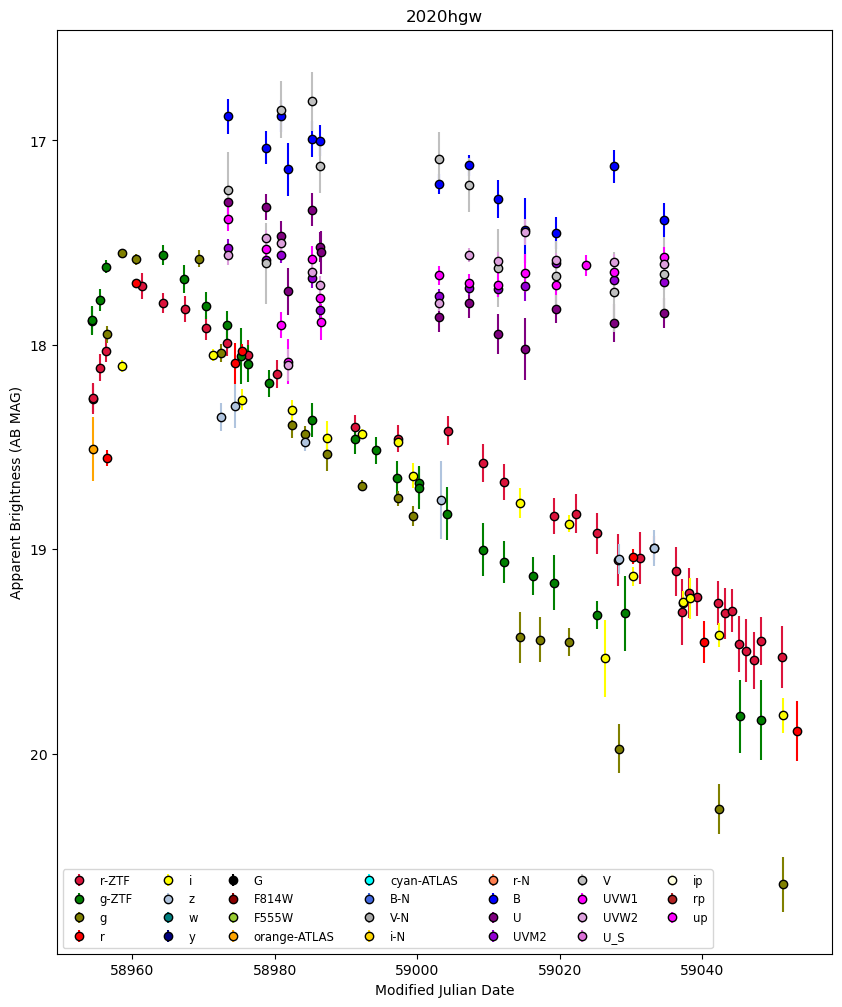

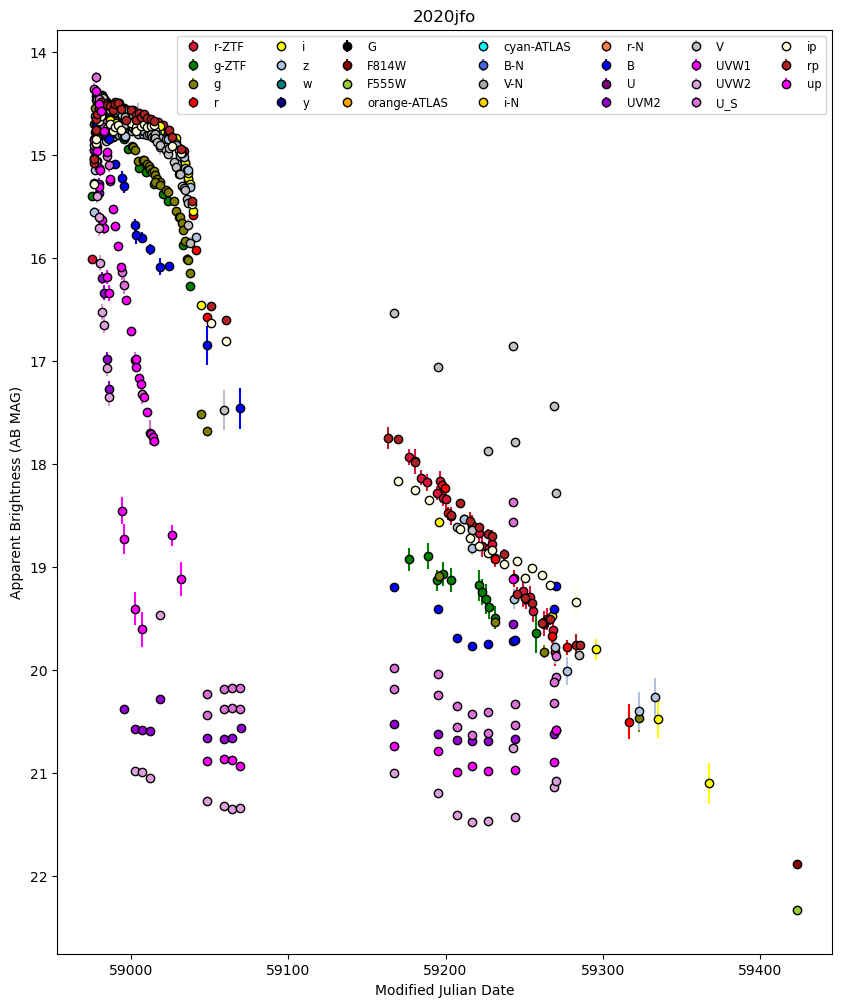

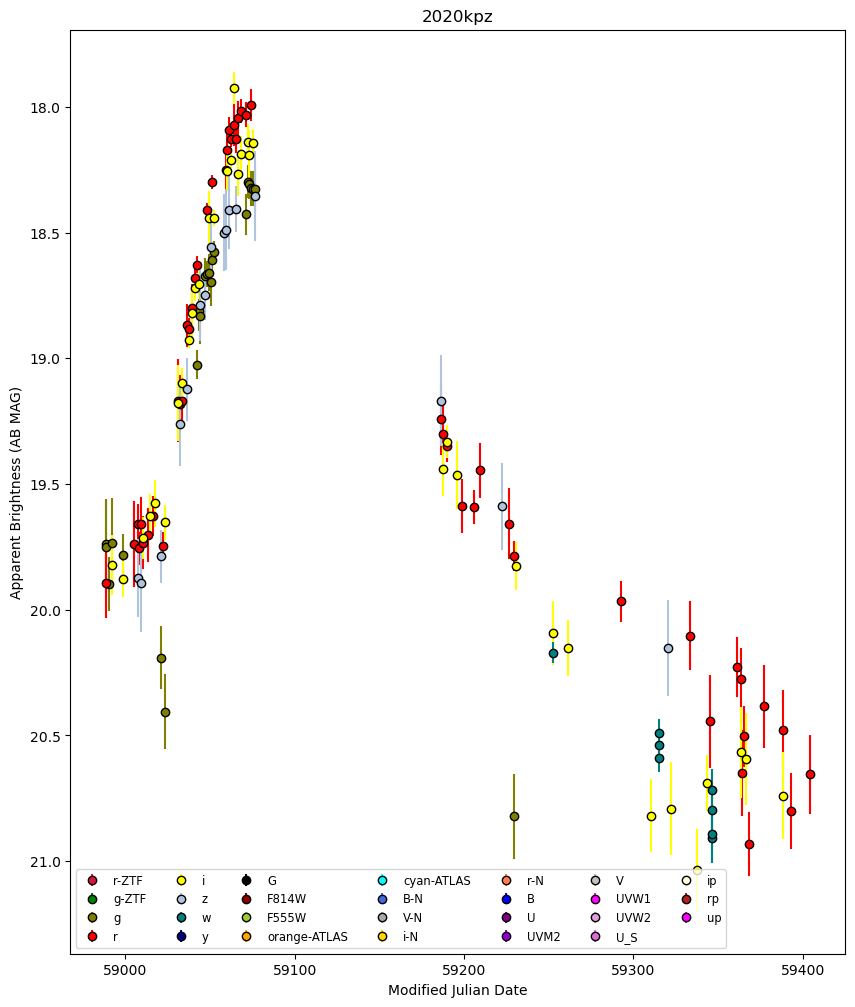

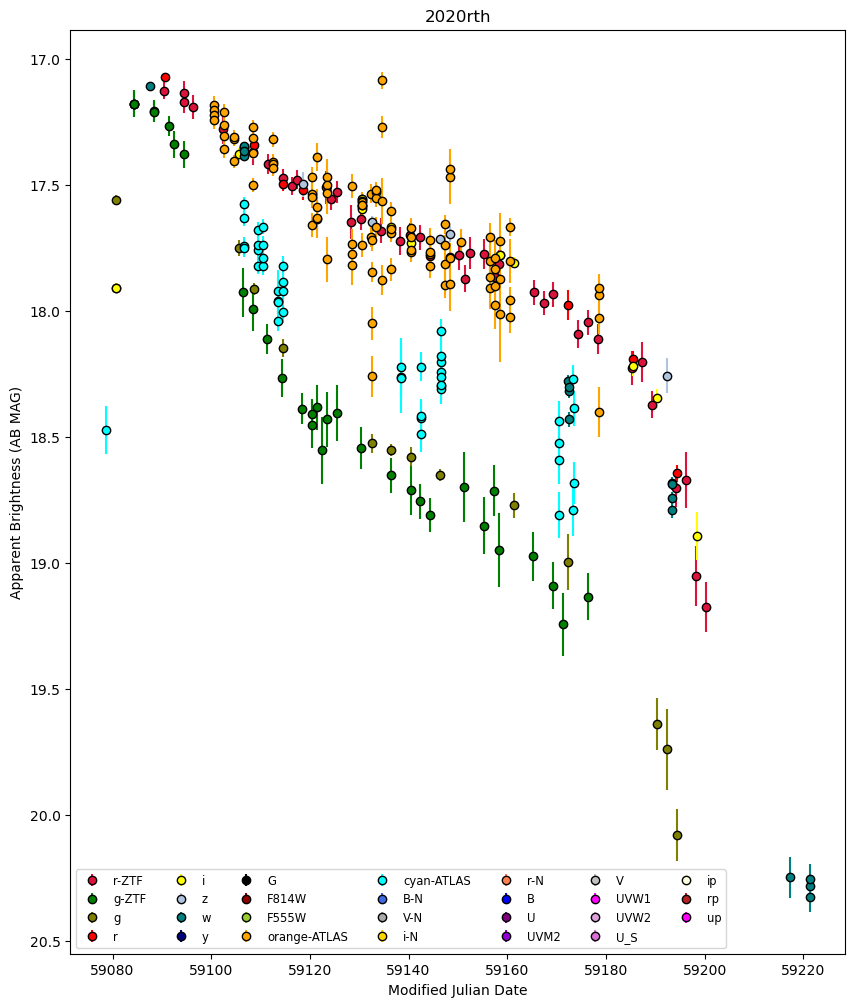

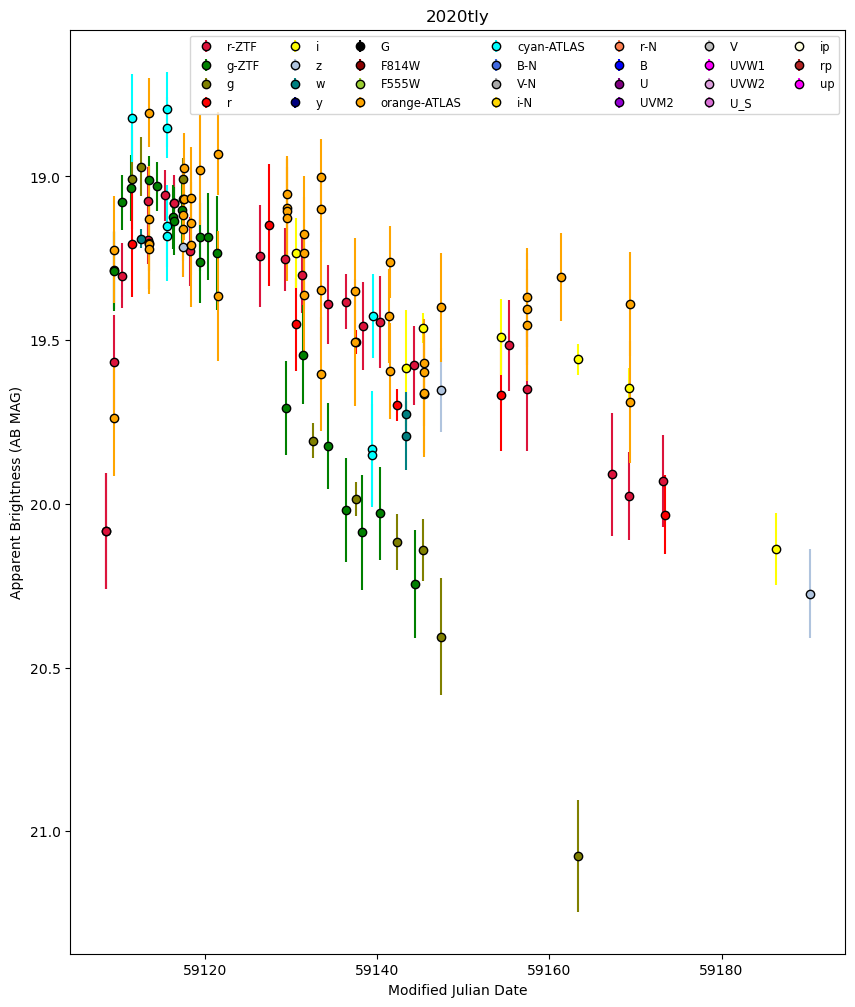

In [156]:
full_data_set = [hgw, jfo, kpz, rth, tly]
full_object_names = ['2020hgw', '2020jfo', '2020kpz', '2020rth', '2020tly']
for idx, table in enumerate(full_data_set):
    plt.figure(idx)
    colors = {'B':'blue','B-N':'royalblue', 'F555W':'yellowgreen', 'F814W': 'darkred', 'G':'black', 'U': 'purple', 'UVM2':'darkviolet', 'UVW1':'magenta', 'UVW2':'plum','U_S':'orchid', 'V':'silver',
         'V-N':'darkgrey', 'cyan-ATLAS':'cyan', 'g-ZTF':'green','g':'olive', 'gp':'darkolivegreen', 'i':'yellow', 'i-N':'gold','ip':'lightyellow', 'orange-ATLAS':'orange', 
         'r':'red', 'r-N':'coral','r-ZTF':'crimson', 'rp':'firebrick', 'up':'fuchsia', 'w':'teal', 'y':'navy', 'z':'lightsteelblue' }
    PAN = {}
    ZTF = {}
    ATLAS = {}
    HST = {}
    GAIA = {}
    NICKEL = {}
    SWOPE = {}
    SWIFT = {}
    plt.rcParams['figure.figsize'] = (10,12)  
    for i, filt in enumerate(['r-ZTF', 'g-ZTF']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
    for i, filt in enumerate(['g', 'r', 'i', 'z', 'w', 'y']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
    for i, filt in enumerate(['G']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        GAIA[filt] = l
    for i, filt in enumerate(['F814W', 'F555W']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        HST[filt] = l
    for i, filt in enumerate(['orange-ATLAS', 'cyan-ATLAS']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ATLAS[filt] = l
    for i, filt in enumerate(['B-N','V-N', 'i-N', 'r-N']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        NICKEL[filt] = l
    for i, filt in enumerate(['B', 'U', 'UVM2', 'V', 'UVW1', 'UVW2', 'U_S']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWIFT[filt] = l
    for i, filt in enumerate(['ip', 'rp', 'up']):
        mask = table['FLT'] == filt
        upperlim = table['MAGERR'] < .2
        nonzero = table['MAGERR'] >= 0 
        mask = mask & upperlim & nonzero
        l = plt.errorbar(table[mask]['MJD'], table[mask]['MAG'], yerr = table[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        SWOPE[filt] = l
    plt.gca().invert_yaxis()
    plt.title(full_object_names[idx])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Apparent Brightness (AB MAG)')
    plt.legend(ncol = 7, fontsize = 'smaller')
    


    

In [157]:
# extrabol input only takes in .dat files with line 1 being redshift and line 2 being Milky Way E(B-V)
# format is TIME(MJD) APPARENT_MAGNITUDE ERROR(MAG) FILTER_SVO_ID MAG_SYSTEM
redshifts = [0.043, 0.005, 0.039, 0.0184, 0.058] 
hgw_df = hgw.to_pandas()
jfo_df = jfo.to_pandas()
kpz_df = kpz.to_pandas()
rth_df = rth.to_pandas()
tly_df = tly.to_pandas()
full_df_list = [hgw_df, jfo_df, kpz_df, rth_df, tly_df]

In [158]:
full_df_list

[    VARLIST:        MJD    FLT  FLUXCAL  FLUXCALERR     MAG  MAGERR MAGSYS  \
 0       OBS:  58954.387  g-ZTF    0.067       0.067  17.882   0.067   None   
 1       OBS:  58954.444  r-ZTF    0.075       0.075  18.263   0.075   None   
 2       OBS:  58955.404  g-ZTF    0.055       0.055  17.780   0.055   None   
 3       OBS:  58955.426  r-ZTF    0.065       0.065  18.111   0.065   None   
 4       OBS:  58956.343  r-ZTF    0.055       0.055  18.028   0.055   None   
 ..       ...        ...    ...      ...         ...     ...     ...    ...   
 342     OBS:  59781.267      i   -1.627      -1.627     NaN  -1.627   None   
 343     OBS:  59785.277      r   -0.176      -0.176     NaN  -0.176   None   
 344     OBS:  59785.280      z   -0.150      -0.150     NaN  -0.150   None   
 345     OBS:  59789.269      r    4.188       4.188  23.301   4.188   None   
 346     OBS:  59789.272      i   -1.082      -1.082     NaN  -1.082   None   
 
        TELESCOPE  
 0            P48  
 1        

here i define the function that will take dataframes and turn them into the .dat files for extrabol. 

first i define a dictionary with filters as keys and the SVO IDs as values for every filter in the dataset. 

then im iterating over every dataframe, where i change the FLT column name to FLT_SVO_ID, and the values in the column to the SVO ID

then i drop columns that extrabol doesn't need, and add another column with the magnitude system, and reorder them 

then i'm just iterating over another list of object names and making filenames 

finally i write the dataframe to a .dat file and print it to make sure it looks ok 

In [163]:
def extrabol_inputs(object_names, object_dfs):
    filter_svos = {'g-ZTF':'Palomar/ZTF.g', 'r-ZTF':'Palomar/ZTF.r', 'cyan-ATLAS':'Misc/Atlas.cyan', 'orange-ATLAS':'Misc/Atlas.orange','g':'PAN-STARRS/PS1.g', 'r':'PAN-STARRS/PS1.r', 
    'i':'PAN-STARRS/PS1.i', 'z':'PAN-STARRS/PS1.z','w':'PAN-STARRS/PS1.w','y':'PAN-STARRS/PS1.y','B':'Swift/UVOT.B', 'U':'Swift/UVOT.U', 'UVM2':'Swift/UVOT.UVM2', 'V':'Swift/UVOT.V', 
    'UVW1':'Swift/UVOT.UVW1', 'UVW2':'Swift/UVOT.UVW2', 'U_S':'Swift/UVOT.U', 'G':'GAIA0.G', 'F814W':'HST/WFPC2-WF.F814W', 'F555W':'HST/WFC3_UVIS1.F555W', 'i-N':'SLOAN/SDSS.i', 
    'r-N':'SLOAN/SDSS.r', 'gp':'LasCumbres/LasCumbres.SDSS_gp', 'rp':'LasCumbres/LasCumbres.SDSS_rp', 'ip':'LasCumbres/LasCumbres.ip', 'up':'LasCumbres/LasCumbres.SDSS_up'}
    for idx, df in enumerate(object_dfs):
        df = df.rename(columns = {'FLT':'FLT_SVO_ID'})
        df['FLT_SVO_ID'] = df['FLT_SVO_ID'].map(filter_svos)
        df.drop(['FLUXCAL', 'FLUXCALERR'], axis=1, inplace=True)
        df.insert(4, 'MAG TYPE', 'AB')
        df = df[['MJD', 'MAG', 'MAGERR', 'FLT_SVO_ID', 'MAG TYPE']]
        filename = object_names[idx] + '.dat' 
        df.to_csv(filename, sep = ' ', header=False, index=False)
        print(df)

        

wtf is U_S i just had it as UVOT.U 

nickel uses SDSS griz, johnson-cousins UBVRI 

sinistro uses SDSS (ugri)' PS1 zs, Y, w, johnson/cousins UBVRI 

thacher uses SDSS and johnson-cousins UBVRI 

pixis lulin uses the same 

might have to change that but honestly im exhausted and will worry about it later 

In [164]:
extrabol_inputs(full_object_names, full_df_list)

           MJD     MAG  MAGERR        FLT_SVO_ID MAG TYPE
0    58954.387  17.882   0.067     Palomar/ZTF.g       AB
1    58954.444  18.263   0.075     Palomar/ZTF.r       AB
2    58955.404  17.780   0.055     Palomar/ZTF.g       AB
3    58955.426  18.111   0.065     Palomar/ZTF.r       AB
4    58956.343  18.028   0.055     Palomar/ZTF.r       AB
..         ...     ...     ...               ...      ...
342  59781.267     NaN  -1.627  PAN-STARRS/PS1.i       AB
343  59785.277     NaN  -0.176  PAN-STARRS/PS1.r       AB
344  59785.280     NaN  -0.150  PAN-STARRS/PS1.z       AB
345  59789.269  23.301   4.188  PAN-STARRS/PS1.r       AB
346  59789.272     NaN  -1.082  PAN-STARRS/PS1.i       AB

[347 rows x 5 columns]
              MJD        MAG    MAGERR            FLT_SVO_ID MAG TYPE
0    58976.096620  14.356838  0.054204          Swift/UVOT.U       AB
1    58977.700058  14.246177  0.054169          Swift/UVOT.U       AB
2    58978.230370  14.395898  0.054154          Swift/UVOT.U       AB
